# Week 05 - Numpy II and Scipy

## Today's Agenda
- Numpy II
- Scipy

# Numpy II

Last time in [Week 05](https://github.com/VandyAstroML/Vanderbilt_Computational_Bootcamp/blob/master/notebooks/Week_05/05_Numpy_Matplotlib.ipynb), we covered `Numpy` and `Matplotlib`. This time we will be focusing on more advanced concepts of `Numpy`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Review
As a review, let's explore some of the concepts that were introduced last time, in `Numpy I`.

### Create 1D-arrays
We introduced how to create a 1D-array

In [2]:
x = np.array([1,2,3,5,6,7,8,10],dtype=float)
x

array([  1.,   2.,   3.,   5.,   6.,   7.,   8.,  10.])

In [3]:
y = np.arange(10)
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
z = np.linspace(0,100,50)
z

array([   0.        ,    2.04081633,    4.08163265,    6.12244898,
          8.16326531,   10.20408163,   12.24489796,   14.28571429,
         16.32653061,   18.36734694,   20.40816327,   22.44897959,
         24.48979592,   26.53061224,   28.57142857,   30.6122449 ,
         32.65306122,   34.69387755,   36.73469388,   38.7755102 ,
         40.81632653,   42.85714286,   44.89795918,   46.93877551,
         48.97959184,   51.02040816,   53.06122449,   55.10204082,
         57.14285714,   59.18367347,   61.2244898 ,   63.26530612,
         65.30612245,   67.34693878,   69.3877551 ,   71.42857143,
         73.46938776,   75.51020408,   77.55102041,   79.59183673,
         81.63265306,   83.67346939,   85.71428571,   87.75510204,
         89.79591837,   91.83673469,   93.87755102,   95.91836735,
         97.95918367,  100.        ])

In [5]:
h = np.random.randn(100)
h

array([-0.99400731, -0.15451093,  0.45367331,  0.85150245,  0.34427612,
       -0.21165813, -0.17052113, -1.07893764, -1.16002915, -0.98349668,
       -0.92908267, -0.71506581,  2.20786732, -0.48074305, -0.50189073,
       -0.53969794,  1.51442337, -0.90359325, -0.05973206, -0.76444539,
        0.91672347,  0.7842283 ,  0.38577893, -0.05719472, -0.53249952,
        0.02553025,  0.78921788,  0.32138015, -3.00173911, -1.48620123,
        1.88334188,  1.83332044,  1.31477219, -0.50337684, -0.53478989,
        0.21113742, -0.75195417, -0.66218911, -1.48151909,  1.96663596,
        0.99873912, -0.14282008,  0.03172124,  0.05610631,  0.38051558,
        1.18690435, -0.9905369 , -1.44139509,  0.47789979, -1.34108013,
       -0.97843927,  1.12711449, -0.88801888, -0.28900582, -0.44482207,
        1.08711085, -1.99240163,  1.7910967 ,  1.32916715, -0.61424754,
       -0.51815721,  2.15326417,  1.043182  , -0.9311497 , -1.91135567,
       -0.69434301, -0.24236014, -1.05992965,  0.11161891,  0.49

### Handling arrays

These are just a few of the different ways to __create__ numpy arrays.

You can also use functions like __np.max()__ and __np.min()__ to get the maximum and minimum values, respectively.

In [6]:
print('Min X: {0:.3f} \t Max X: {1:.3f}'.format(np.min(x), np.max(x)) )

Min X: 1.000 	 Max X: 10.000


#### Apply mathematical functions

In [7]:
zz = x**2 + 3*x**3
zz

array([    4.,    28.,    90.,   400.,   684.,  1078.,  1600.,  3100.])

#### Conditionals
Find the indices of the elements in an array that meet some criteria.
In this example, we're finding all the elements that are within 100 and 500 in array ___"```zz```"___.

In [8]:
zz_idx = np.where((zz>= 100)&(zz <= 500))[0]
print('zz_idx: {0}'.format(zz_idx))

zz[zz_idx]

zz_idx: [3]


array([ 400.])

## Manipulating Arrays
There are a lot of things we can do to a _numpy array_. 

In [9]:
h1 = np.random.randint(10, 50, 50)
h1

array([19, 18, 27, 33, 27, 40, 49, 27, 27, 24, 28, 38, 49, 37, 42, 26, 19,
       42, 24, 41, 38, 45, 11, 27, 23, 13, 38, 27, 15, 49, 37, 43, 38, 45,
       37, 44, 41, 40, 13, 23, 16, 36, 24, 19, 23, 37, 32, 26, 41, 15])

We can get the overall __size__ and __shape__ of the array.

We cane use the functions `numpy.size` and `numpy.shape` to get the total number of elements in an array and the shape of the array, respectively.

In [10]:
np.size(h1)

50

In [11]:
h1.shape

(50,)

In [12]:
A = np.array([[1,2,3,4,5],
              [6,7,8,9,10],
              [12,13,14,16,17],
              [13,45,67,89,90] ])
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [12, 13, 14, 16, 17],
       [13, 45, 67, 89, 90]])

In [13]:
np.shape(A)

(4, 5)

You can also __transpose__ array `A`.

In [14]:
A_t = np.transpose(A)
A_t

array([[ 1,  6, 12, 13],
       [ 2,  7, 13, 45],
       [ 3,  8, 14, 67],
       [ 4,  9, 16, 89],
       [ 5, 10, 17, 90]])

Why are `Numpy` arrays better than lists:
- Python lists are very _general_.
- Lists __do not__ support matrix and dot multiplications, etc.
- `Numpy` arrays are memory _efficient_.
- Numpy arrays are __statically typed__ and __homogeneous__.
- They are fast at mathematical functions.
- They can be used in compiled languages, e.g. _C_ and _Fortran_.

### Array-generating functions
For large arrays it is inpractical to initialize the data manually, using normal Python lists. Instead, we can use many of the Numpy functions to generate arrays of different forms.

#### __numpy.arange__
We use this one to create a sequence of ordered elements

In [15]:
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
np.arange(0,20,5)

array([ 0,  5, 10, 15])

In [17]:
np.arange(-40,21,10)

array([-40, -30, -20, -10,   0,  10,  20])

#### linspace and logspace
We use these functions to created ordered lists, separated by intervals in _real_- and _log_-space.

In [18]:
B = np.linspace(0,50)
B

array([  0.        ,   1.02040816,   2.04081633,   3.06122449,
         4.08163265,   5.10204082,   6.12244898,   7.14285714,
         8.16326531,   9.18367347,  10.20408163,  11.2244898 ,
        12.24489796,  13.26530612,  14.28571429,  15.30612245,
        16.32653061,  17.34693878,  18.36734694,  19.3877551 ,
        20.40816327,  21.42857143,  22.44897959,  23.46938776,
        24.48979592,  25.51020408,  26.53061224,  27.55102041,
        28.57142857,  29.59183673,  30.6122449 ,  31.63265306,
        32.65306122,  33.67346939,  34.69387755,  35.71428571,
        36.73469388,  37.75510204,  38.7755102 ,  39.79591837,
        40.81632653,  41.83673469,  42.85714286,  43.87755102,
        44.89795918,  45.91836735,  46.93877551,  47.95918367,
        48.97959184,  50.        ])

In [19]:
B = np.linspace(0,100, 20)
B

array([   0.        ,    5.26315789,   10.52631579,   15.78947368,
         21.05263158,   26.31578947,   31.57894737,   36.84210526,
         42.10526316,   47.36842105,   52.63157895,   57.89473684,
         63.15789474,   68.42105263,   73.68421053,   78.94736842,
         84.21052632,   89.47368421,   94.73684211,  100.        ])

Array of __25 elements__ from $10^{0}$ to $10^{3}$, with __base of 10__.

In [20]:
B = np.logspace(0,3,25)
B

array([    1.        ,     1.33352143,     1.77827941,     2.37137371,
           3.16227766,     4.21696503,     5.62341325,     7.49894209,
          10.        ,    13.33521432,    17.7827941 ,    23.71373706,
          31.6227766 ,    42.16965034,    56.23413252,    74.98942093,
         100.        ,   133.35214322,   177.827941  ,   237.13737057,
         316.22776602,   421.69650343,   562.34132519,   749.89420933,
        1000.        ])

Creating an array of 11 elements from $e^{0}$ to $e^{10}$, with the ```base == numpy.e```

In [21]:
B = np.logspace(0,10,11, base=np.e)
B

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03,   2.20264658e+04])

#### Random Data

In [22]:
from numpy import random

In [23]:
# Uniform random numbers in [0,1]
random.rand(5,5)

array([[ 0.52083207,  0.20916416,  0.46950393,  0.4762486 ,  0.03347006],
       [ 0.85866833,  0.56097689,  0.16279829,  0.11145204,  0.43862642],
       [ 0.63711999,  0.89840482,  0.22151726,  0.47390952,  0.62385931],
       [ 0.30527473,  0.44097163,  0.48798399,  0.93960785,  0.8872513 ],
       [ 0.18047378,  0.02478854,  0.06809591,  0.57856437,  0.64305439]])

In [24]:
# 20 Random integers from 10 to 30
random.randint(10,30,20)

array([28, 15, 14, 11, 12, 10, 12, 18, 23, 18, 11, 18, 22, 20, 18, 28, 28,
       18, 10, 14])

#### Arrays of `zeros` and `ones`.

In [25]:
np.zeros(20)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

You can use these to populate other arrays

In [26]:
nelem = 10
C = np.ones(10)
C

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [27]:
for ii in range(C.size):
    C[ii] = random.rand()
C

array([ 0.42228076,  0.77272613,  0.24118221,  0.21992347,  0.72263211,
        0.53129367,  0.47322165,  0.95427282,  0.56336409,  0.84101201])

### Diagonals
You can also construct an array with another array as the diagonal

In [28]:
np.diag(random.randint(10,20,5))

array([[13,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0, 15]])

### Indexing

You can choose which values to select.
Normally, you select the `rows` first, and then the `cols` of a `numpy.ndarray`.

In [29]:
M = random.rand(10,5)
M

array([[  7.20640298e-02,   8.03827229e-01,   2.43569204e-01,
          2.57850405e-01,   1.34632044e-01],
       [  9.09951211e-02,   8.59185621e-01,   6.26815642e-01,
          9.25070888e-01,   6.14176013e-01],
       [  5.78352683e-01,   4.10939385e-01,   7.49759370e-01,
          1.37766061e-01,   6.30965073e-01],
       [  7.53525031e-01,   2.22104794e-01,   9.19813030e-01,
          8.19516230e-01,   3.44585259e-01],
       [  6.99158391e-01,   6.11765790e-01,   5.85971377e-01,
          7.78860493e-01,   1.25960996e-01],
       [  3.75672886e-01,   9.35643150e-01,   5.67284546e-01,
          8.97619292e-01,   7.14623130e-01],
       [  8.00072770e-01,   9.70511901e-01,   3.06688108e-01,
          7.14961078e-01,   4.80100044e-01],
       [  6.57401497e-01,   9.49705624e-01,   1.68431305e-01,
          7.24768204e-01,   4.04264171e-01],
       [  4.01108700e-01,   7.92568055e-01,   5.45651062e-04,
          7.98870595e-01,   3.92903675e-01],
       [  6.24722294e-02,   5.9967406

Selecting the 1st row

In [30]:
M[1,:]

array([ 0.09099512,  0.85918562,  0.62681564,  0.92507089,  0.61417601])

The 2nd column

In [31]:
M[:,1]

array([ 0.80382723,  0.85918562,  0.41093938,  0.22210479,  0.61176579,
        0.93564315,  0.9705119 ,  0.94970562,  0.79256806,  0.59967406])

Select a range of columns and rows

In [32]:
M[1:3, 2:4]

array([[ 0.62681564,  0.92507089],
       [ 0.74975937,  0.13776606]])

You can easily use this to create a __mask__, for when you are _cleaning_ your data.

In [33]:
A = random.rand(3,3)
np.fill_diagonal(A, np.nan)
A

array([[        nan,  0.24201989,  0.08752277],
       [ 0.54752085,         nan,  0.33217542],
       [ 0.78281775,  0.8390725 ,         nan]])

In [34]:
B = np.arange(0,9).reshape((3,3))
B

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Appying the __mask__ from $A \to B$

In [35]:
A_mask = np.isfinite(A)
A_mask

array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True, False]], dtype=bool)

In [36]:
B[A_mask]

array([1, 2, 3, 5, 6, 7])

### Binning you data
This is probably one of the best functions of `Numpy`.
You can use this to bin you data, and calculate __means__, __standard deviations__, etc.

#### numpy.digitize

In [37]:
# Creating my bin edges
bins = np.arange(0,13)
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [38]:
# Generating Data
data = 10*random.rand(100)
data

array([ 6.49821599,  6.41014225,  7.14950146,  5.62470008,  9.33940911,
        0.19615878,  5.81828452,  5.43377125,  2.41031474,  7.70948806,
        0.8932094 ,  5.2719603 ,  2.58837196,  4.21287679,  8.36166961,
        8.74986785,  8.70630494,  1.63130183,  6.26211477,  5.04529227,
        3.93778964,  3.10351166,  1.91277375,  1.46417716,  2.19707905,
        6.99970258,  3.67857406,  5.898428  ,  3.05010573,  9.48459361,
        2.88675261,  0.16213008,  7.28528292,  7.05646853,  8.01231606,
        2.71172196,  2.673238  ,  1.99873128,  4.41156255,  5.91840927,
        5.92499364,  6.9376388 ,  1.18050267,  4.63009679,  4.28801494,
        2.88619396,  9.35440279,  8.83734527,  5.12347778,  4.91798396,
        7.72076627,  0.51714376,  9.33635771,  6.95092869,  0.58929676,
        6.01761232,  3.61343692,  2.81348236,  2.37961752,  0.2598851 ,
        4.6460126 ,  9.08105794,  8.28630595,  0.66983597,  1.81379809,
        4.15318902,  4.15873491,  0.75521468,  8.8253752 ,  0.04

Now I want to bin my data and calculate the mean for each bin

In [39]:
# Defining statistical function to use
stat_func = np.nanmean
# Binning the data
data_bins = np.digitize(data, bins)
data_bins

array([ 7,  7,  8,  6, 10,  1,  6,  6,  3,  8,  1,  6,  3,  5,  9,  9,  9,
        2,  7,  6,  4,  4,  2,  2,  3,  7,  4,  6,  4, 10,  3,  1,  8,  8,
        9,  3,  3,  2,  5,  6,  6,  7,  2,  5,  5,  3, 10,  9,  6,  5,  8,
        1, 10,  7,  1,  7,  4,  3,  3,  1,  5, 10,  9,  1,  2,  5,  5,  1,
        9,  1,  1,  2,  6,  5,  1,  9,  5,  8,  8, 10,  2,  9,  9,  7,  7,
        2,  4,  5,  2,  6,  6,  7,  9,  5,  7,  4,  8,  6,  4,  2])

Calculating the __mean__ for each of the bins

In [40]:
failval = -10
bins_stat = np.array([stat_func(data[data_bins == ii]) \
                      if len(data[data_bins == ii]) > 0 \
                      else failval \
                      for ii in xrange(1,len(bins))])
bins_stat = np.asarray(bins_stat)
bins_stat

array([  0.48438025,   1.55879669,   2.61630802,   3.39835341,
         4.48888266,   5.53845662,   6.59741001,   7.37873867,
         8.60354021,   9.34976193, -10.        , -10.        ])

With this function, it is really easy to apply statistics on binned data, as well as to ___estimate errors___ on the data.

### Reshaping, resizing and stacking arrays
One can always modify the shape of a `numpy.ndarray`, as well as append it to a pre-existing array.

In [41]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [42]:
n, m = A.shape

In [43]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [44]:
A_f = A.flatten()

In [45]:
C = random.rand(A.size)
C

array([ 0.19128911,  0.57823882,  0.24878763,  0.39657524,  0.60868046,
        0.63974783,  0.46267723,  0.01998228,  0.55092204,  0.63844936,
        0.08424844,  0.1178531 ,  0.2605398 ,  0.18705487,  0.26524993,
        0.55921608,  0.70568846,  0.80065224,  0.32349928,  0.5289561 ,
        0.91586611,  0.81767972,  0.17038868,  0.28769872,  0.06057029])

In [46]:
C.shape

(25,)

In [47]:
# Stacking the two arrays
D = np.column_stack((A_f,C))
D

array([[  0.00000000e+00,   1.91289109e-01],
       [  1.00000000e+00,   5.78238816e-01],
       [  2.00000000e+00,   2.48787626e-01],
       [  3.00000000e+00,   3.96575235e-01],
       [  4.00000000e+00,   6.08680462e-01],
       [  1.00000000e+01,   6.39747834e-01],
       [  1.10000000e+01,   4.62677232e-01],
       [  1.20000000e+01,   1.99822778e-02],
       [  1.30000000e+01,   5.50922038e-01],
       [  1.40000000e+01,   6.38449356e-01],
       [  2.00000000e+01,   8.42484394e-02],
       [  2.10000000e+01,   1.17853100e-01],
       [  2.20000000e+01,   2.60539795e-01],
       [  2.30000000e+01,   1.87054871e-01],
       [  2.40000000e+01,   2.65249932e-01],
       [  3.00000000e+01,   5.59216077e-01],
       [  3.10000000e+01,   7.05688457e-01],
       [  3.20000000e+01,   8.00652237e-01],
       [  3.30000000e+01,   3.23499284e-01],
       [  3.40000000e+01,   5.28956104e-01],
       [  4.00000000e+01,   9.15866113e-01],
       [  4.10000000e+01,   8.17679723e-01],
       [  

In [48]:
# Selecting from 3rd to 11th row
D[2:10]

array([[  2.        ,   0.24878763],
       [  3.        ,   0.39657524],
       [  4.        ,   0.60868046],
       [ 10.        ,   0.63974783],
       [ 11.        ,   0.46267723],
       [ 12.        ,   0.01998228],
       [ 13.        ,   0.55092204],
       [ 14.        ,   0.63844936]])

#### np.concatenate
You can also concadenate different arrays

In [49]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5,6]])

In [50]:
np.concatenate((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [51]:
np.concatenate((a,b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### Copy and "Deep Copy"
Sometimes it is important to create new _copies_ of arrays and other objects. For this reason, one uses __numpy.copy__ to create _new_ copies of arrays

In [52]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [53]:
# `B` is now referring to the same array data as `A`
B = A

If we make any changes to `B`, __`A` will also be affected by this change__.

In [54]:
B[0,0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [55]:
A

array([[10,  2],
       [ 3,  4]])

To get a __completely independent, new object__, you would use:

In [56]:
B = np.copy(A)
# Modifying `B`
B[0,0] = -5
B

array([[-5,  2],
       [ 3,  4]])

In [57]:
A

array([[10,  2],
       [ 3,  4]])

The array `A` was not affected by this changed. This is important when you're constantly re-defining new arrays

# Scipy - Library of Scientific Algorithms for Python

`SciPy` provides a large number of higher-level scientif algorithms.
It includes:
- Special Functions
- Integration
- Optimization
- Interpolation
- Fourier Transforms
- Signal Processing
- Linear Algebra
- Statistics
- Multi-dimensional image processing

In [58]:
from scipy import *

## Interpolation
You can use `Scipy` to interpolate your data.
You would use the `interp1d` function to interpolate your function.

In [59]:
from scipy.interpolate import *

In [60]:
def f(x):
    return np.sin(x)

In [61]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

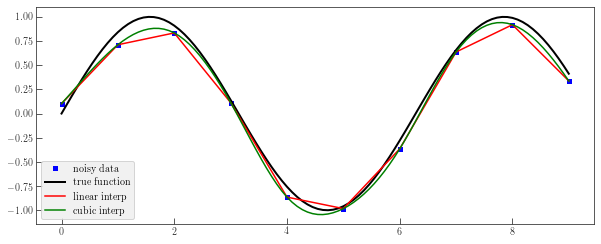

In [62]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_facecolor('white')
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

### KD-Trees
You can also use `SciPy` to calculate __KD-Trees__ for a set of points

In [63]:
Lbox = 250.
Npts = 1000
# Creating cartesian coordinates
x = np.random.uniform(0, Lbox, Npts)
y = np.random.uniform(0, Lbox, Npts)
z = np.random.uniform(0, Lbox, Npts)
sample1 = np.vstack([x, y, z]).T
sample1

array([[  29.97084048,   83.70201436,  244.7334759 ],
       [ 169.90821434,   54.39523605,  216.99049523],
       [ 136.16726216,  220.75200499,  100.38244749],
       ..., 
       [  87.29467063,   26.89732224,  222.09370448],
       [ 200.13101232,   27.84003363,   92.85642522],
       [  44.50785257,  111.70047818,   96.49064269]])

In [64]:
sample1.shape

(1000, 3)

Let's say we want to know how many points are within distances of 30 and 50 from other points. To know this, you construct a __KD-Tree__

In [65]:
from scipy.spatial import cKDTree

In [66]:
# Initializing KDTree
KD_obj = cKDTree(sample1)

In [67]:
N_neighbours = cKDTree.count_neighbors(KD_obj, KD_obj, 50) - \
                cKDTree.count_neighbors(KD_obj, KD_obj, 30)
print("Number of Neighbours: {0}".format(N_neighbours))

Number of Neighbours: 20042


Let's say you want to get the distances to the __Nth-nearest__ neighbor.

In [68]:
k_nearest = 4
dist_k, dist_k_idx = cKDTree.query(KD_obj, sample1, k_nearest)
dist_k

array([[  0.        ,  25.93189529,  26.17156604,  26.81214231],
       [  0.        ,   9.5017603 ,  12.9681842 ,  20.79923232],
       [  0.        ,  11.45087107,  15.74440684,  19.75190004],
       ..., 
       [  0.        ,  13.64764887,  19.40903698,  21.12311228],
       [  0.        ,   6.21723664,   6.54602253,  14.30274301],
       [  0.        ,  10.27377938,  16.74578303,  18.35651455]])

You can also get the indices

In [69]:
dist_k_idx

array([[  0, 800, 364,  67],
       [  1, 522,  74,  98],
       [  2, 442, 578, 218],
       ..., 
       [997, 679, 276, 235],
       [998, 681, 291, 212],
       [999, 354, 599,  70]])

The first columns corresponds to _itself_.

You can also find pairs that are separated by at most a distance _r_

In [70]:
pairs = KD_obj.query_ball_tree(KD_obj, 30)
pairs[0:10]

[[0, 67, 364, 470, 800, 921],
 [1, 74, 98, 100, 522, 528, 596, 633, 637, 914],
 [2, 218, 279, 296, 361, 442, 486, 578, 624, 756],
 [3, 524, 580, 634, 653, 866, 929],
 [4, 21, 543, 804, 864, 973],
 [5, 409, 464, 559, 784, 792, 903, 944, 958],
 [6, 15, 24, 144, 456, 607, 870, 988],
 [7, 213, 229, 606, 824, 978],
 [8, 55, 197, 655, 677, 686, 863],
 [9, 21, 135, 258, 262, 544, 587]]

__So that's it for today's lesson__

# Next week:
- Advanced Visualization
- Seaborn